In [1]:
import datetime
from dateutil.relativedelta import relativedelta
#from datetime import timedelta
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mtick
from matplotlib.ticker import FormatStrFormatter
from matplotlib.lines import Line2D
import matplotlib.animation as animation

import seaborn as sns

In [2]:
sns.set_style('whitegrid')

In [3]:
df = pd.read_csv('./BuyOffersByQtyPurchased.csv', header=0, index_col=0)
df_comp = pd.read_csv('./BuyOffersAlgComp.csv', header=0, index_col=0)

In [4]:
df.dropna(inplace=True)
df_comp.dropna(inplace=True)

In [5]:
filt_Gen = df['CatalogBinding'] == 'Mass Market Paperback'
#filt_GenComp = df_comp['CatalogBinding'] == 'General'
df_Gen = df[filt_Gen].reset_index(drop=True)

C:\Users\WMiller\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


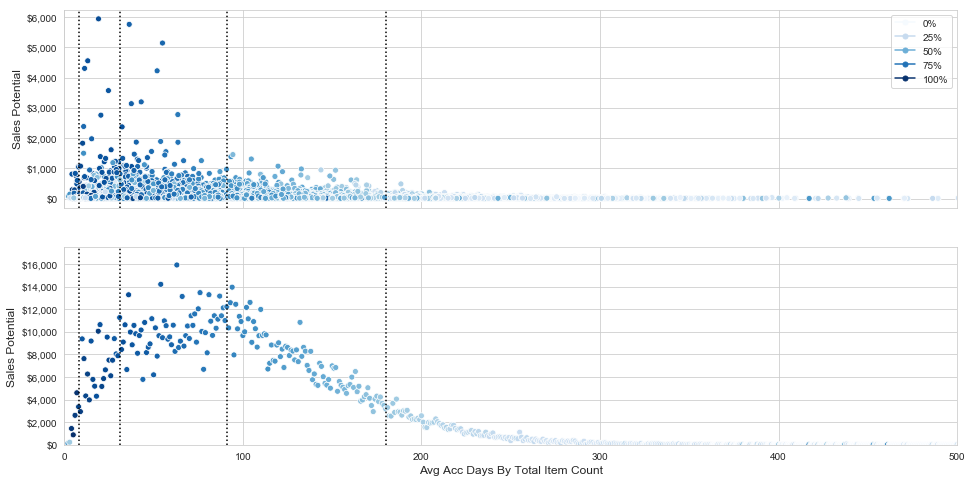

<Figure size 432x288 with 0 Axes>

In [6]:
plt_val = np.histogram(df_Gen['avg_Item_Acc_Days'], range=(0,750), bins=750, weights=df_Gen['qty_Purchased'] * df_Gen['Avg_Sale_Price'])

plt_STHist = np.nan_to_num(np.histogram(df_Gen['avg_Item_Acc_Days'], range=(0,750), bins=750, weights=df_Gen['Total_Sold'])[0]/
    np.histogram(df_Gen['avg_Item_Acc_Days'], range=(0,750), bins=750, weights=df_Gen['Total_Item_Count'])[0])
plt_ST = (df_Gen['Total_Sold']/df_Gen['Total_Item_Count'])

fig, (ax2, ax1) = plt.subplots(2, 1, figsize=(16, 8), sharex=True)

sns.scatterplot(plt_val[1][0:-1], plt_val[0], ax=ax1,
                alpha = 1, hue=plt_STHist, palette='Blues', legend=False)
ax1.axvline(x=8, ymin=0, ymax=1, color='black', linestyle=':')
ax1.axvline(x=31, ymin=0, ymax=1, color='black', linestyle=':')
ax1.axvline(x=91, ymin=0, ymax=1, color='black', linestyle=':')
ax1.axvline(x=180, ymin=0, ymax=1, color='black', linestyle=':')
ax1.set_xlim([0,750])
ax1.set_ylim([0,17500])
ax1.set_xlabel('Avg Acc Days By Total Item Count', fontsize=12)
ax1.set_ylabel('Sales Potential', fontsize=12)
ax1.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}')) 

sns.scatterplot(df_Gen['avg_Item_Acc_Days'], 
                df_Gen['qty_Purchased'] * df_Gen['Avg_Sale_Price'], ax=ax2,
                alpha = 1, hue=plt_ST, palette='Blues', legend=False)
ax2.axvline(x=8, ymin=0, ymax=1, color='black', linestyle=':')
ax2.axvline(x=31, ymin=0, ymax=1, color='black', linestyle=':')
ax2.axvline(x=91, ymin=0, ymax=1, color='black', linestyle=':')
ax2.axvline(x=180, ymin=0, ymax=1, color='black', linestyle=':')
ax2.set_xlim([0,500])
ax2.set_xlabel('Avg Acc Days By Total Item Count', fontsize=12)
ax2.set_ylabel('Sales Potential', fontsize=12)
ax2.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}')) 

#Create legend
cmap = sns.color_palette('Blues', 100)
legend_elements = [Line2D([0], [0], marker='o', color=cmap[0], label='0%', markersize=5),
                   Line2D([0], [0], marker='o', color=cmap[24], label='25%', markersize=5),
                   Line2D([0], [0], marker='o', color=cmap[49], label='50%', markersize=5),
                   Line2D([0], [0], marker='o', color=cmap[74], label='75%', markersize=5),
                   Line2D([0], [0], marker='o', color=cmap[99], label='100%', markersize=5),
                 ]

ax2.legend(handles=legend_elements, loc = 'upper right', prop=dict(size=10))
#ax2.get_legend().remove()

plt.show()
plt.savefig('./pbcomp_DTSbyItemCountDist.png')

In [7]:
filt_cat = ((df_Gen['qty_Purchased'] * df_Gen['Avg_Sale_Price']) > 10000) & (df_Gen['avg_Item_Acc_Days'] < 8)
df_Gen[filt_cat]

,CatalogID,CatalogBinding,qty_Purchased,R4BuyOfferAmt,R4sBuyOfferAmt,R4BuyOfferPct,R4sBuyOfferPct,Total_Accumulated_Days_With_Trash_Penalty,Total_Item_Count,Total_Sold,Avg_Sale_Price,avg_Item_Acc_Days,avg_Sold_Acc_Days


C:\Users\WMiller\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


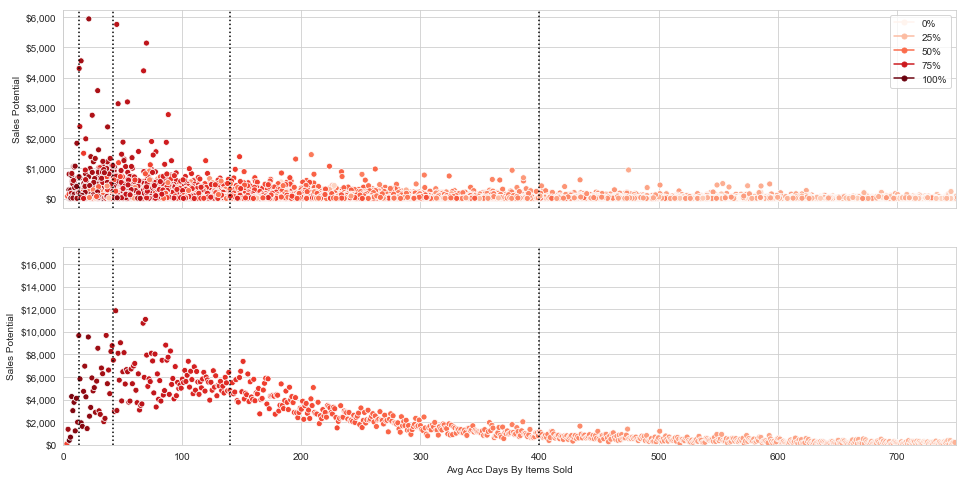

<Figure size 432x288 with 0 Axes>

In [8]:
plt_val = np.histogram(df_Gen['avg_Sold_Acc_Days'], range=(0,750), bins=750, weights=df_Gen['qty_Purchased'] * df_Gen['Avg_Sale_Price'])

plt_STHist = np.nan_to_num(np.histogram(df_Gen['avg_Sold_Acc_Days'], range=(0,750), bins=750, weights=df_Gen['Total_Sold'])[0]/
    np.histogram(df_Gen['avg_Sold_Acc_Days'], range=(0,750), bins=750, weights=df_Gen['Total_Item_Count'])[0])
plt_ST = (df_Gen['Total_Sold']/df_Gen['Total_Item_Count'])

fig, (ax2, ax1) = plt.subplots(2, 1, figsize=(16, 8), sharex=True)

sns.scatterplot(plt_val[1][0:-1], plt_val[0], ax=ax1,
                alpha = 1, hue=plt_STHist, palette='Reds', legend=False)
ax1.set_xlim([0,750])
ax1.set_ylim([0,17500])
ax1.axvline(x=13, ymin=0, ymax=1, color='black', linestyle=':')
ax1.axvline(x=42, ymin=0, ymax=1, color='black', linestyle=':')
ax1.axvline(x=140, ymin=0, ymax=1, color='black', linestyle=':')
ax1.axvline(x=400, ymin=0, ymax=1, color='black', linestyle=':')
ax1.set_xlabel('Avg Acc Days By Items Sold')
ax1.set_ylabel('Sales Potential')
ax1.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}')) 

sns.scatterplot(df_Gen['avg_Sold_Acc_Days'], 
                df_Gen['qty_Purchased'] * df_Gen['Avg_Sale_Price'], ax=ax2,
                alpha = 1, hue=plt_ST, palette='Reds', legend=False)
ax2.set_xlim([0,750])
ax2.axvline(x=13, ymin=0, ymax=1, color='black', linestyle=':')
ax2.axvline(x=42, ymin=0, ymax=1, color='black', linestyle=':')
ax2.axvline(x=140, ymin=0, ymax=1, color='black', linestyle=':')
ax2.axvline(x=400, ymin=0, ymax=1, color='black', linestyle=':')

ax2.set_xlabel('Avg Acc Days By Total Item Count')
ax2.set_ylabel('Sales Potential')
ax2.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}')) 

#Create legend
cmap = sns.color_palette('Reds', 100)
legend_elements = [Line2D([0], [0], marker='o', color=cmap[0], label='0%', markersize=5),
                   Line2D([0], [0], marker='o', color=cmap[24], label='25%', markersize=5),
                   Line2D([0], [0], marker='o', color=cmap[49], label='50%', markersize=5),
                   Line2D([0], [0], marker='o', color=cmap[74], label='75%', markersize=5),
                   Line2D([0], [0], marker='o', color=cmap[99], label='100%', markersize=5),
                 ]

ax2.legend(handles=legend_elements, loc = 'upper right', prop=dict(size=10))
#ax2.get_legend().remove()

plt.show()
plt.savefig('./pbcomp_DTSbyItemsSoldDist.png')

In [9]:
filt_cat = ((df_Gen['qty_Purchased'] * df_Gen['Avg_Sale_Price']) > 4000) & (df_Gen['avg_Sold_Acc_Days'] < 8)
df_Gen[filt_cat]

,CatalogID,CatalogBinding,qty_Purchased,R4BuyOfferAmt,R4sBuyOfferAmt,R4BuyOfferPct,R4sBuyOfferPct,Total_Accumulated_Days_With_Trash_Penalty,Total_Item_Count,Total_Sold,Avg_Sale_Price,avg_Item_Acc_Days,avg_Sold_Acc_Days


C:\Users\WMiller\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
C:\Users\WMiller\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


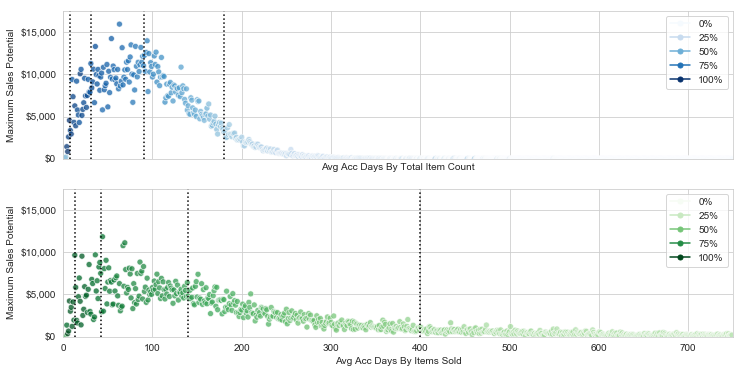

In [10]:
filt_ST = (df_Gen['Total_Sold'] / df_Gen['Total_Item_Count']) < 1

plt_val = np.histogram(df_Gen[filt_ST]['avg_Sold_Acc_Days'], range=(0,750), bins=750, weights=df_Gen[filt_ST]['qty_Purchased'] * df_Gen[filt_ST]['Avg_Sale_Price'])

plt_STHist = np.nan_to_num(np.histogram(df_Gen[filt_ST]['avg_Sold_Acc_Days'], range=(0,750), bins=750, weights=df_Gen[filt_ST]['Total_Sold'])[0]/
    np.histogram(df_Gen[filt_ST]['avg_Sold_Acc_Days'], range=(0,750), bins=750, weights=df_Gen[filt_ST]['Total_Item_Count'])[0])
plt_ST = (df_Gen[filt_ST]['Total_Sold']/df_Gen[filt_ST]['Total_Item_Count'])
fig, (ax2, ax1) = plt.subplots(2, 1, figsize=(12, 6), sharex=True)

sns.scatterplot(plt_val[1][:-1], plt_val[0], ax=ax1,
                alpha = 0.75, hue=plt_STHist, palette='Greens', legend=False)

ax1.axvline(x=13, ymin=0, ymax=1, color='black', linestyle=':')
ax1.axvline(x=42, ymin=0, ymax=1, color='black', linestyle=':')
ax1.axvline(x=140, ymin=0, ymax=1, color='black', linestyle=':')
ax1.axvline(x=400, ymin=0, ymax=1, color='black', linestyle=':')
ax1.set_xlim([0,750])
max_yval = 1.1 * plt_val[0].max()
ax1.set_ylim([0, max_yval])
ax1.set_xlabel('Avg Acc Days By Items Sold')
ax1.set_ylabel('Maximum Sales Potential')
ax1.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}')) 


plt_val2 = np.histogram(df_Gen[filt_ST]['avg_Item_Acc_Days'], range=(0,750), bins=750, weights=df_Gen[filt_ST]['qty_Purchased'] * df_Gen[filt_ST]['Avg_Sale_Price'])

plt_STHist2 = np.nan_to_num(np.histogram(df_Gen[filt_ST]['avg_Item_Acc_Days'], range=(0,750), bins=750, weights=df_Gen[filt_ST]['Total_Sold'])[0]/
    np.histogram(df_Gen[filt_ST]['avg_Item_Acc_Days'], range=(0,750), bins=750, weights=df_Gen[filt_ST]['Total_Item_Count'])[0])
plt_ST2 = (df_Gen[filt_ST]['Total_Sold']/df_Gen[filt_ST]['Total_Item_Count'])

sns.scatterplot(plt_val2[1][:-1], plt_val2[0], ax=ax2,
                alpha = 0.75, hue=plt_STHist2, palette='Blues', legend=False)
ax2.axvline(x=8, ymin=0, ymax=1, color='black', linestyle=':')
ax2.axvline(x=31, ymin=0, ymax=1, color='black', linestyle=':')
ax2.axvline(x=91, ymin=0, ymax=1, color='black', linestyle=':')
ax2.axvline(x=180, ymin=0, ymax=1, color='black', linestyle=':')
ax2.set_xlim([0,750])
ax2.set_xlabel('Avg Acc Days By Total Item Count')
ax2.set_ylabel('Maximum Sales Potential')
ax2.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}')) 

#Determine maximum y axis value for both axes
max_yval = 1.1 * max([plt_val[0].max(), plt_val2[0].max()])
ax1.set_ylim([0, max_yval])
ax2.set_ylim([0, max_yval])

#Create legend
cmap1 = sns.color_palette('Blues', 100)
cmap2 = sns.color_palette('Greens', 100)
legend_elements1 = [Line2D([0], [0], marker='o', color=cmap1[0], label='0%', markersize=5),
                   Line2D([0], [0], marker='o', color=cmap1[24], label='25%', markersize=5),
                   Line2D([0], [0], marker='o', color=cmap1[49], label='50%', markersize=5),
                   Line2D([0], [0], marker='o', color=cmap1[74], label='75%', markersize=5),
                   Line2D([0], [0], marker='o', color=cmap1[99], label='100%', markersize=5)]
legend_elements2 = [Line2D([0], [0], marker='o', color=cmap2[0], label='0%', markersize=5),
                   Line2D([0], [0], marker='o', color=cmap2[24], label='25%', markersize=5),
                   Line2D([0], [0], marker='o', color=cmap2[49], label='50%', markersize=5),
                   Line2D([0], [0], marker='o', color=cmap2[74], label='75%', markersize=5),
                   Line2D([0], [0], marker='o', color=cmap2[99], label='100%', markersize=5)]

ax1.legend(handles=legend_elements2, loc = 'upper right', prop=dict(size=10))
ax2.legend(handles=legend_elements1, loc = 'upper right', prop=dict(size=10))
#ax2.get_legend().remove()

plt.show()

In [11]:
df_Gen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29337 entries, 0 to 29336
Data columns (total 13 columns):
CatalogID                                    29337 non-null int64
CatalogBinding                               29337 non-null object
qty_Purchased                                29337 non-null int64
R4BuyOfferAmt                                29337 non-null float64
R4sBuyOfferAmt                               29337 non-null float64
R4BuyOfferPct                                29337 non-null float64
R4sBuyOfferPct                               29337 non-null float64
Total_Accumulated_Days_With_Trash_Penalty    29337 non-null float64
Total_Item_Count                             29337 non-null int64
Total_Sold                                   29337 non-null int64
Avg_Sale_Price                               29337 non-null float64
avg_Item_Acc_Days                            29337 non-null float64
avg_Sold_Acc_Days                            29337 non-null float64
dtypes: float64(

In [12]:
df_comp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 305437 entries, 0 to 306802
Data columns (total 13 columns):
CreateTime               305437 non-null object
LocationNo               305437 non-null int64
ItemLineNo               305437 non-null int64
CatalogID                305437 non-null int64
CatalogBinding           305437 non-null object
SuggestedOffer           305437 non-null float64
Quantity                 305437 non-null int64
r40_SuggestedOffer       305437 non-null float64
r40_SuggestedOfferPct    305437 non-null float64
r41_SuggestedOffer       305437 non-null float64
r41_SuggestedOfferPct    305437 non-null float64
r42_SuggestedOffer       305437 non-null float64
r42_SuggestedOfferPct    305437 non-null float64
dtypes: float64(7), int64(4), object(2)
memory usage: 32.6+ MB


In [13]:
filt_GenComp = df_comp['CatalogBinding'] == 'General'
df_comp[filt_GenComp].groupby('r40_SuggestedOfferPct')[['Quantity', 'r40_SuggestedOffer']].sum()

,Quantity,r40_SuggestedOffer
r40_SuggestedOfferPct,,
0.00,57151,0.00
0.05,89030,25913.05
0.20,83091,119250.68
0.30,31403,87488.28
0.40,4492,29171.45


In [14]:
df_comp[filt_GenComp].groupby('r41_SuggestedOfferPct')[['Quantity', 'r41_SuggestedOffer']].sum()

,Quantity,r41_SuggestedOffer
r41_SuggestedOfferPct,,
0.00,76646,0.00
0.05,83640,25053.59
0.20,73091,107772.24
0.30,27791,79066.06
0.40,3999,27057.69


In [15]:
df_comp[filt_GenComp].groupby('r42_SuggestedOfferPct')[['Quantity', 'r42_SuggestedOffer']].sum()

,Quantity,r42_SuggestedOffer
r42_SuggestedOfferPct,,
0.00,61087,146.124500
0.05,86609,25737.551355
0.20,78180,115010.088525
0.30,31829,86410.718210
0.40,7462,34846.687105


In [16]:
df_comp[(df_comp['r42_SuggestedOfferPct'] == 0) & (df_comp['r42_SuggestedOffer'] > 0)]

,CreateTime,LocationNo,ItemLineNo,CatalogID,CatalogBinding,SuggestedOffer,Quantity,r40_SuggestedOffer,r40_SuggestedOfferPct,r41_SuggestedOffer,r41_SuggestedOfferPct,r42_SuggestedOffer,r42_SuggestedOfferPct
2279,2019-09-03 13:57:58,5,1,6701050,General,0.31,1,0.31,0.05,0.00,0.00,0.311745,0.0
3673,2019-09-05 13:26:06,5,47,8799964,General,0.15,1,0.22,0.05,0.22,0.05,0.222025,0.0
4550,2019-09-06 13:50:26,5,34,3323529,General,0.25,1,0.00,0.00,0.00,0.00,0.189690,0.0
5822,2019-09-07 15:43:58,5,6,14970130,Mass Market Paperback,0.47,1,0.47,0.10,0.47,0.10,0.465970,0.0
6007,2019-09-07 19:19:27,5,5,2551438,General,0.00,1,0.00,0.00,0.00,0.00,0.206245,0.0
8025,2019-09-10 14:18:44,5,168,8798161,General,0.22,1,0.21,0.05,0.21,0.05,0.212665,0.0
9483,2019-09-12 13:23:20,5,10,2551438,General,0.00,1,0.00,0.00,0.00,0.00,0.206245,0.0
15104,2019-09-20 20:46:20,5,53,10858769,General,0.10,1,0.10,0.05,0.00,0.00,0.103605,0.0
16907,2019-09-23 09:09:02,5,53,1315587,General,1.17,1,1.14,0.20,0.29,0.05,0.285505,0.0
18037,2019-09-24 18:38:01,5,41,10860869,General,0.00,1,0.00,0.00,0.00,0.00,0.084985,0.0


In [17]:
%matplotlib notebook

In [18]:
# Set up formatting for the movie files
Writer = animation.writers['pillow']
writer = Writer(fps=30, metadata=dict(artist='Me'), bitrate=1800)

In [19]:
class AnimatedScatter_SoldDist(object):
    """An animated scatter plot using matplotlib.animations.FuncAnimation."""
    def __init__(self, df_Gen, range_ST, num_frames):
        self.df_Gen = df_Gen
        self.min_ST = range_ST[0]
        self.max_ST = range_ST[1]
        self.num_frames = num_frames
        self.stream = self.data_stream()
        # Setup the figure and axes...
        self.fig, self.ax = plt.subplots(figsize=(12, 6))
        # Then setup FuncAnimation.
        self.ani = animation.FuncAnimation(self.fig, self.update, interval=5, 
                                           init_func=self.setup_plot, save_count=self.num_frames-1,
                                           blit=True)

    def setup_plot(self):
        """Initial drawing of the scatter plot."""
        x, y, c = next(self.stream).T
        self.scat = self.ax.scatter(x, y, c=c, s=25, cmap='Reds', alpha=1, edgecolor='k', vmin=0, vmax=1)
        self.ax.axis([0, 750, 0, 17500])
        self.ax.axvline(x=13, ymin=0, ymax=1, color='black', linestyle=':')
        self.ax.axvline(x=42, ymin=0, ymax=1, color='black', linestyle=':')
        self.ax.axvline(x=140, ymin=0, ymax=1, color='black', linestyle=':')
        self.ax.axvline(x=400, ymin=0, ymax=1, color='black', linestyle=':')
        cmap = sns.color_palette('Reds', 100)
        legend_elements = [Line2D([0], [0], marker='o', color=cmap[0], label='0%', markersize=5),
                   Line2D([0], [0], marker='o', color=cmap[24], label='25%', markersize=5),
                   Line2D([0], [0], marker='o', color=cmap[49], label='50%', markersize=5),
                   Line2D([0], [0], marker='o', color=cmap[74], label='75%', markersize=5),
                   Line2D([0], [0], marker='o', color=cmap[99], label='100%', markersize=5)]
        self.ax.legend(handles=legend_elements, loc = 'upper right', prop=dict(size=10))
        self.ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}')) 
        # For FuncAnimation's sake, we need to return the artist we'll be using
        # Note that it expects a sequence of artists, thus the trailing comma.
        return self.scat,

    def data_stream(self):
        for s in np.linspace(self.min_ST, self.max_ST, num=self.num_frames):
            filt_ST = (self.df_Gen['Total_Sold'] / self.df_Gen['Total_Item_Count']) <= s
            xy = np.histogram(self.df_Gen[filt_ST]['avg_Sold_Acc_Days'], range=(0,750), bins=750, weights=self.df_Gen[filt_ST]['qty_Purchased'] * self.df_Gen[filt_ST]['Avg_Sale_Price'])
            c = np.nan_to_num(np.histogram(self.df_Gen[filt_ST]['avg_Sold_Acc_Days'], range=(0,750), bins=750, weights=self.df_Gen[filt_ST]['Total_Sold'])[0]/
                                   np.histogram(self.df_Gen[filt_ST]['avg_Sold_Acc_Days'], range=(0,750), bins=750, weights=self.df_Gen[filt_ST]['Total_Item_Count'])[0])
            yield np.c_[xy[1][:-1], xy[0], c]

    def update(self, i):
        """Update the scatter plot."""
        data = next(self.stream)
        str_title = 'Sales Potential at ' + '{:0.0%}'.format((self.max_ST - self.min_ST) * ((i+2) / self.num_frames) + self.min_ST) + ' Maximum Sell-Through'
        self.ax.set_title(str_title)
        # Set x and y data...
        self.scat.set_offsets(data[:, :2])
        # Set sizes...
        #self.scat.set_sizes(1)
        # Set colors..
        self.scat.set_array(data[:, 2])
        # We need to return the updated artist for FuncAnimation to draw..
        # Note that it expects a sequence of artists, thus the trailing comma.
        return self.scat,

In [20]:
class AnimatedScatter_CountDist(object):
    """An animated scatter plot using matplotlib.animations.FuncAnimation."""
    def __init__(self, df_Gen, range_ST, num_frames):
        self.df_Gen = df_Gen
        self.min_ST = range_ST[0]
        self.max_ST = range_ST[1]
        self.num_frames = num_frames
        self.stream = self.data_stream()
        # Setup the figure and axes...
        self.fig, self.ax = plt.subplots(figsize=(12, 6))
        # Then setup FuncAnimation.
        self.ani = animation.FuncAnimation(self.fig, self.update, interval=5, 
                                           init_func=self.setup_plot, save_count=self.num_frames-1,
                                           blit=True)

    def setup_plot(self):
        """Initial drawing of the scatter plot."""
        x, y, c = next(self.stream).T
        self.scat = self.ax.scatter(x, y, c=c, s=25, cmap='Blues', alpha=1, edgecolor='k', vmin=0, vmax=1)
        self.ax.axis([0, 750, 0, 17500])
        self.ax.axvline(x=8, ymin=0, ymax=1, color='black', linestyle=':')
        self.ax.axvline(x=31, ymin=0, ymax=1, color='black', linestyle=':')
        self.ax.axvline(x=91, ymin=0, ymax=1, color='black', linestyle=':')
        self.ax.axvline(x=180, ymin=0, ymax=1, color='black', linestyle=':')
        cmap = sns.color_palette('Blues', 100)
        legend_elements = [Line2D([0], [0], marker='o', color=cmap[0], label='0%', markersize=5),
                   Line2D([0], [0], marker='o', color=cmap[24], label='25%', markersize=5),
                   Line2D([0], [0], marker='o', color=cmap[49], label='50%', markersize=5),
                   Line2D([0], [0], marker='o', color=cmap[74], label='75%', markersize=5),
                   Line2D([0], [0], marker='o', color=cmap[99], label='100%', markersize=5)]
        self.ax.legend(handles=legend_elements, loc = 'upper right', prop=dict(size=10))
        self.ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}')) 
        # For FuncAnimation's sake, we need to return the artist we'll be using
        # Note that it expects a sequence of artists, thus the trailing comma.
        return self.scat,

    def data_stream(self):
        for s in np.linspace(self.min_ST, self.max_ST, num=self.num_frames):
            filt_ST = (self.df_Gen['Total_Sold'] / self.df_Gen['Total_Item_Count']) <= s
            xy = np.histogram(self.df_Gen[filt_ST]['avg_Item_Acc_Days'], range=(0,750), bins=750, weights=self.df_Gen[filt_ST]['qty_Purchased'] * self.df_Gen[filt_ST]['Avg_Sale_Price'])
            c = np.nan_to_num(np.histogram(self.df_Gen[filt_ST]['avg_Item_Acc_Days'], range=(0,750), bins=750, weights=self.df_Gen[filt_ST]['Total_Sold'])[0]/
                                   np.histogram(self.df_Gen[filt_ST]['avg_Item_Acc_Days'], range=(0,750), bins=750, weights=self.df_Gen[filt_ST]['Total_Item_Count'])[0])
            yield np.c_[xy[1][:-1], xy[0], c]

    def update(self, i):
        """Update the scatter plot."""
        data = next(self.stream)
        # Set x and y data...
        str_title = 'Sales Potential at ' + '{:0.0%}'.format((self.max_ST - self.min_ST) * ((i+2) / self.num_frames) + self.min_ST) + ' Maximum Sell-Through'
        self.ax.set_title(str_title)
        self.scat.set_offsets(data[:, :2])
        # Set sizes...
        #self.scat.set_sizes(1)
        # Set colors..
        self.scat.set_array(data[:, 2])
        # We need to return the updated artist for FuncAnimation to draw..
        # Note that it expects a sequence of artists, thus the trailing comma.
        return self.scat,

<IPython.core.display.Javascript object>


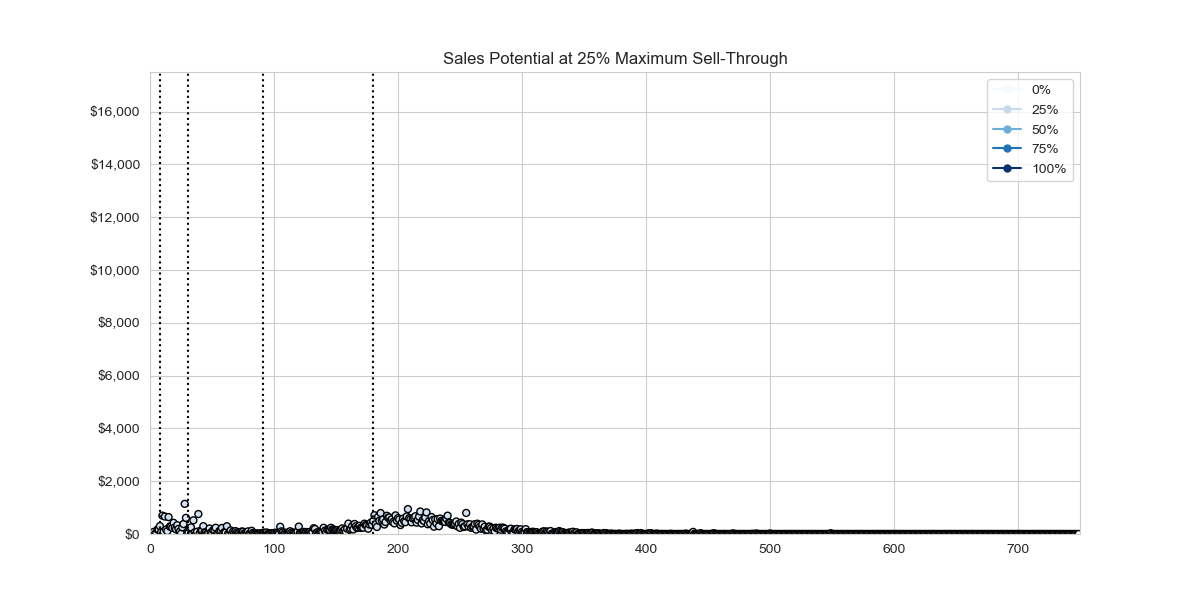

C:\Users\WMiller\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


In [21]:
a = AnimatedScatter_CountDist(df_Gen, [0, 0.25], 250)
#plt.show()
a.ani.save('pbDTS_ItemDistByST_0to25.gif', writer=writer)

<IPython.core.display.Javascript object>


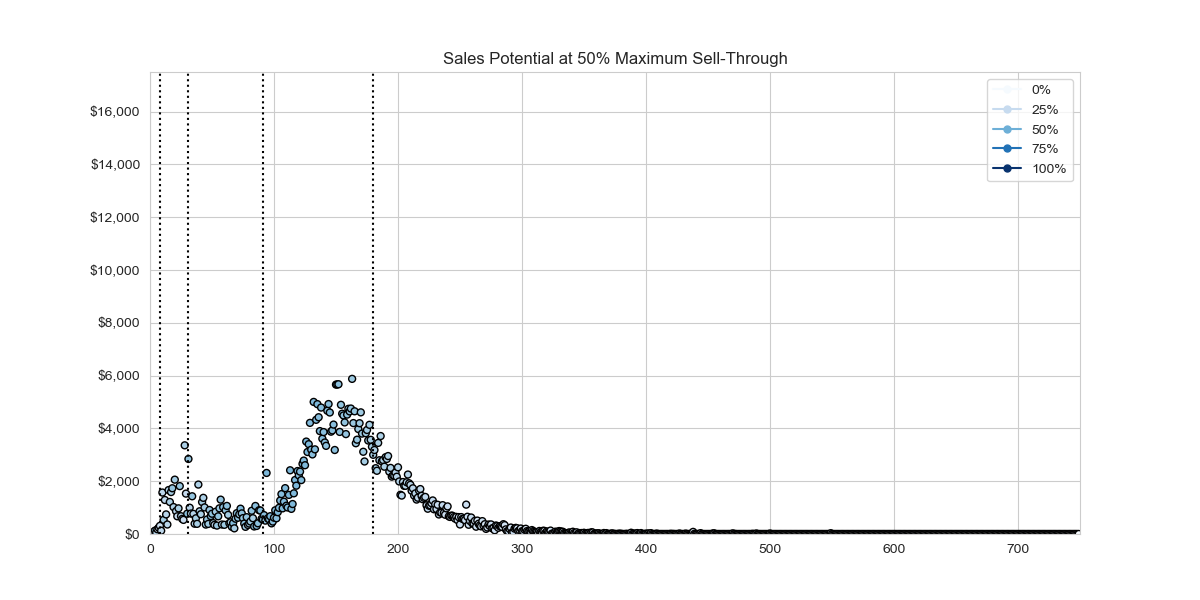

C:\Users\WMiller\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


In [22]:
a = AnimatedScatter_CountDist(df_Gen, [0.25, 0.50], 250)
#plt.show()
a.ani.save('pbDTS_ItemDistByST_25to50.gif', writer=writer)

<IPython.core.display.Javascript object>


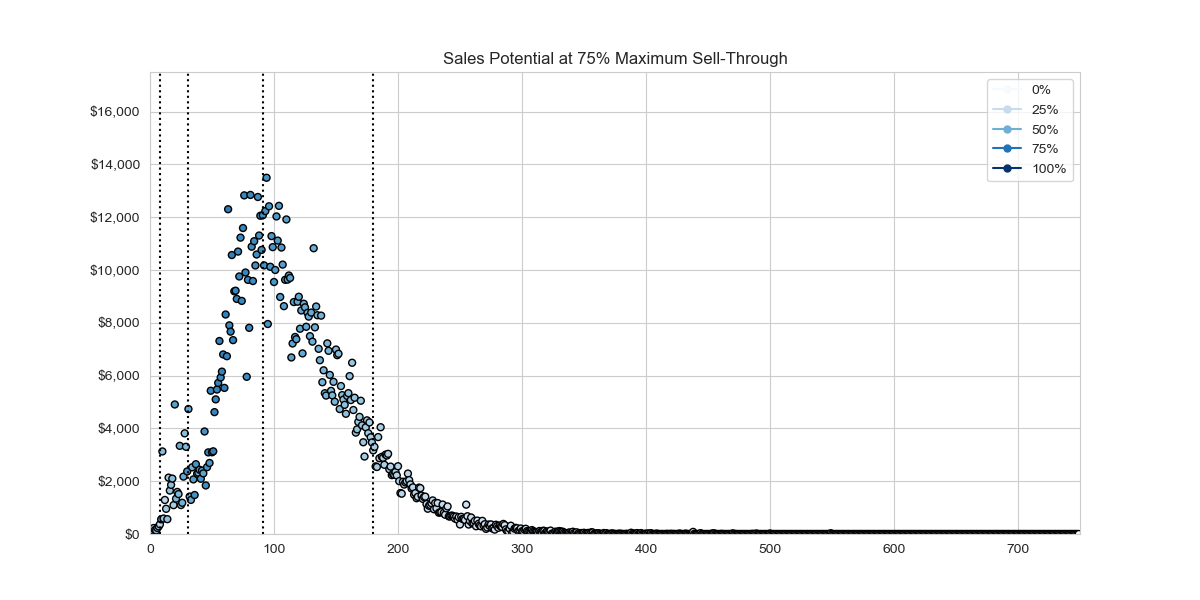

C:\Users\WMiller\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


In [23]:
a = AnimatedScatter_CountDist(df_Gen, [0.50, 0.75], 250)
#plt.show()
a.ani.save('pbDTS_ItemDistByST_50to75.gif', writer=writer)

<IPython.core.display.Javascript object>


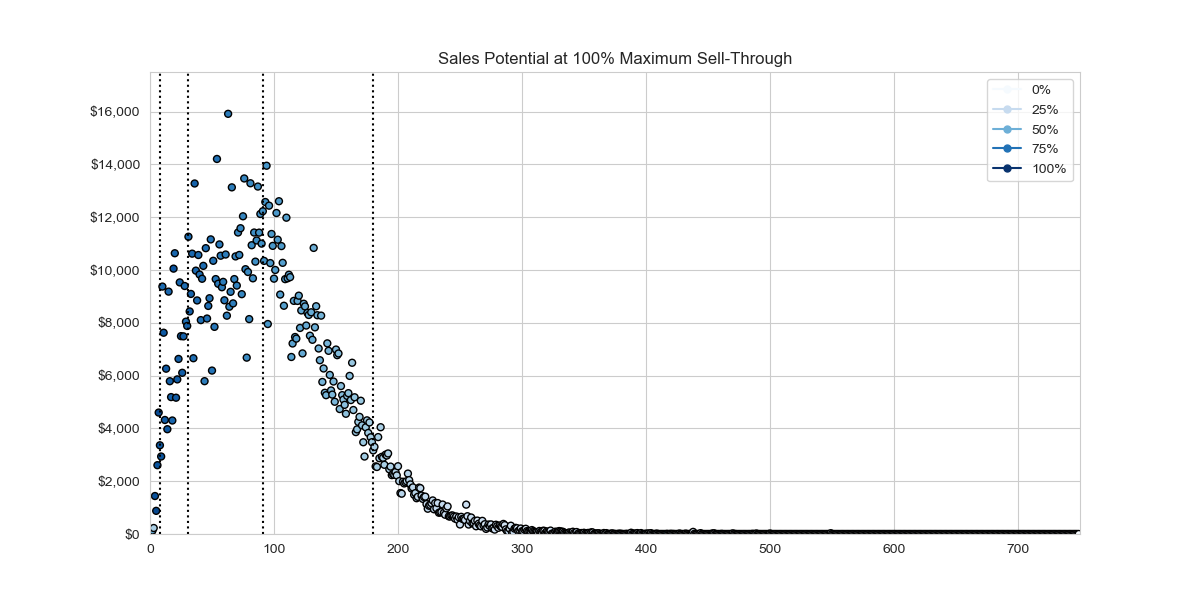

C:\Users\WMiller\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


In [24]:
a = AnimatedScatter_CountDist(df_Gen, [0.75, 1], 250)
#plt.show()
a.ani.save('pbDTS_ItemDistByST_75to100.gif', writer=writer)

<IPython.core.display.Javascript object>


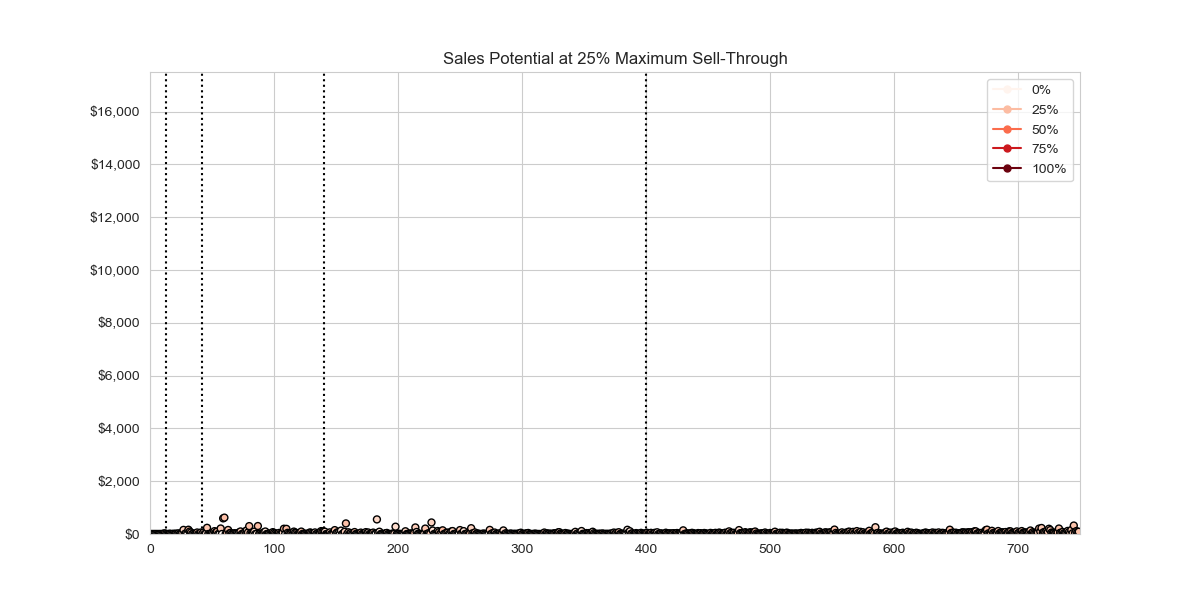

C:\Users\WMiller\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


In [25]:
a = AnimatedScatter_SoldDist(df_Gen, [0, 0.25], 250)
#plt.show()
a.ani.save('pbDTS_SoldDistByST_0to25.gif', writer=writer)

<IPython.core.display.Javascript object>


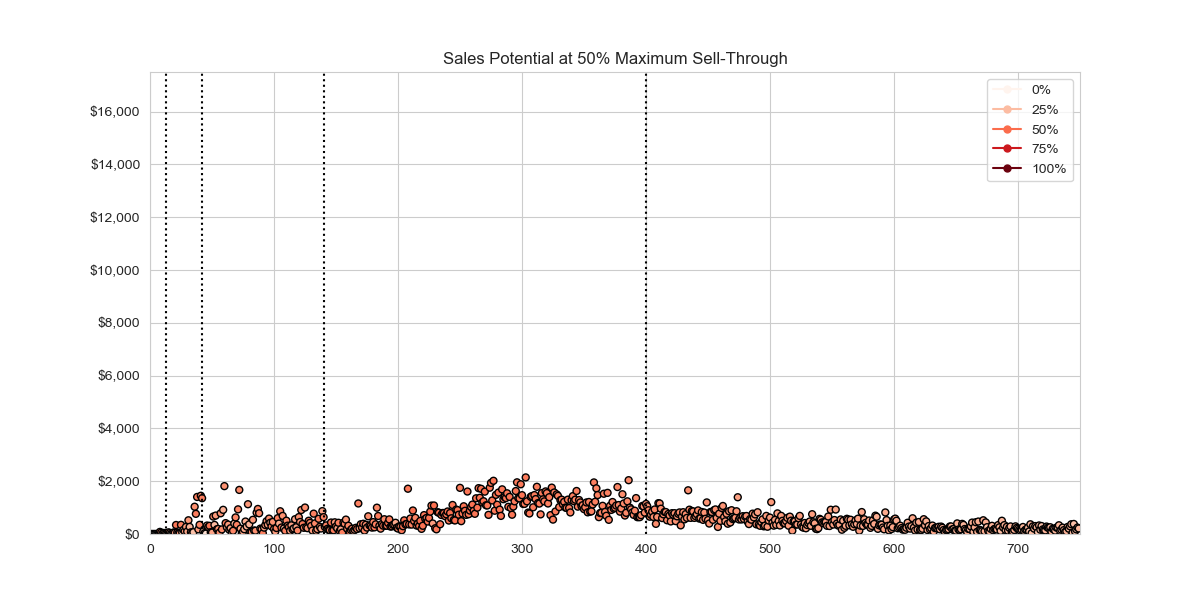

C:\Users\WMiller\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


In [26]:
a = AnimatedScatter_SoldDist(df_Gen, [0.25, 0.50], 250)
#plt.show()
a.ani.save('pbDTS_SoldDistByST_25to50.gif', writer=writer)

<IPython.core.display.Javascript object>


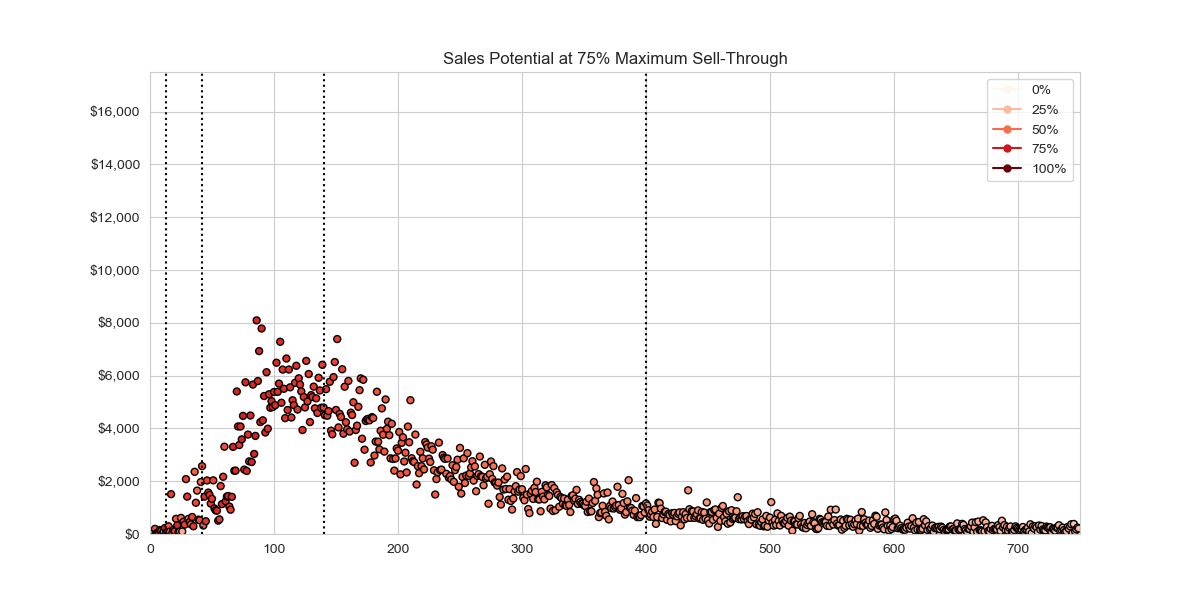

C:\Users\WMiller\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


In [27]:
a = AnimatedScatter_SoldDist(df_Gen, [0.50, 0.75], 250)
#plt.show()
a.ani.save('pbDTS_SoldDistByST_50to75.gif', writer=writer)

<IPython.core.display.Javascript object>


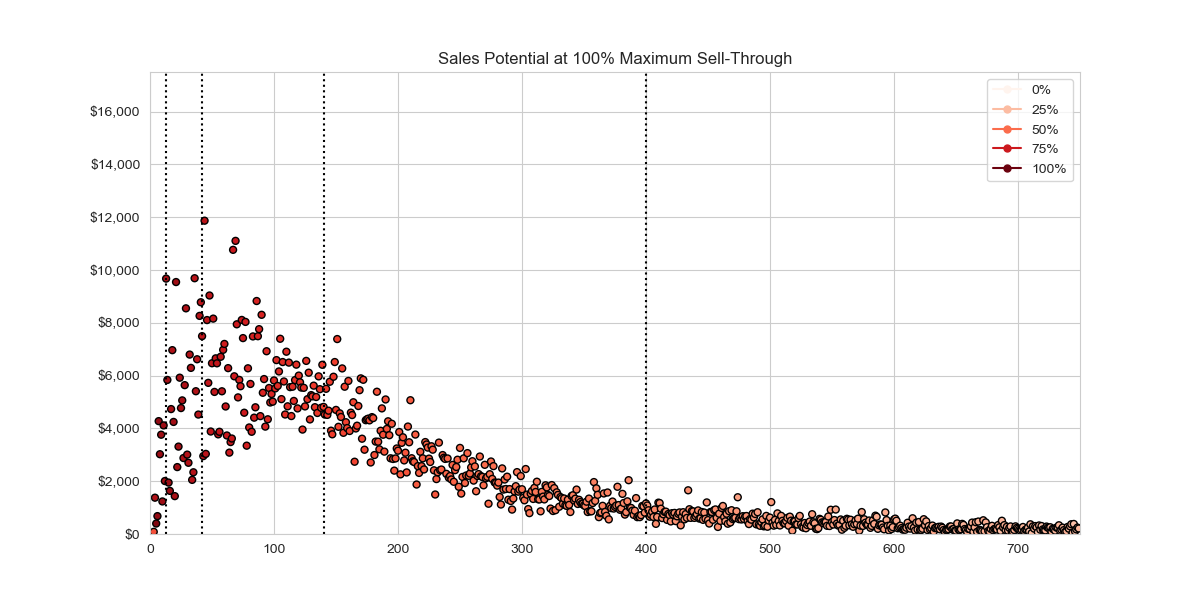

C:\Users\WMiller\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


In [29]:
a = AnimatedScatter_SoldDist(df_Gen, [0.75, 1], 250)
#plt.show()
a.ani.save('pbDTS_SoldDistByST_75to100.gif', writer=writer)